In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
party=pd.read_csv("party.csv")
voterA=pd.read_csv("voterA.csv")
voterB=pd.read_csv("voterB.csv")
print(voterA)
print(voterB)
party

   Strategy A  Strategy B
0    0.269263    0.734255
1   -0.631297    0.703330
2   -0.142668   -0.616330
3    0.909489   -0.564459
4   -0.473955   -0.201368
5   -0.639274   -0.582814
6    0.786265   -0.484420
7   -0.760116   -0.227635
8    0.004161    0.048494
9    0.034272   -0.690538
   Strategy A  Strategy B
0   -0.570796    0.994946
1    0.982965    0.810510
2    0.037603    0.025811
3   -0.907685    0.493337
4    0.729768   -0.466732
5    0.906707    0.957192
6   -0.246578    0.487487
7   -0.432575    0.084391
8   -0.153370   -0.482514
9   -0.294094    0.412653


,party,A,B
0,1.0,0.34,0.33
1,2.0,0.38,0.06


In [2]:
voterA=np.array(voterA)
voterB=np.array(voterB)
#np.sum(va[:,1])
partyA=np.array(party)
partyB=np.array(party)

In [8]:
def MovePeopleToIndex(party):
    if(party[0,0]==1 and party[1,0]==2):
        print("people in index !")
        party=np.delete(party,0,1)#np.delete(arrary,index,0:row 1:col)
    return party

In [4]:
def WinratePID(va,vb,pa,pb):
    #print(pb)
    pr=party.shape[0]+1
    pc=party.shape[1]
    for row in range(pr-1):
        for col in range(1,pc):
            #print("0:",pb)
            #print(row," ",col)
            #print(pa[row,col],"=",np.sum(va[:,row]),"*",pa[row,col])
            pa[row,col]=np.sum(va[:,row])*pa[row,col]
            #print("1:",pb)
            #print(pb[row,col],"=",np.sum(vb[:,row]),"*",pb[row,col])
            #print("2:",pb)
            pb[row,col]=np.sum(vb[:,row])*pb[row,col]
            #print("3:",pb)
    Uaza=pa[0,1]+pa[1,1]
    Uazb=pa[0,2]+pa[1,2]
    Ubza=pb[0,1]+pb[1,1]
    Ubzb=pb[0,2]+pb[1,2]
    Uza=Uaza+Ubza 
    Uzb=Ubzb+Uazb
    va_shape=np.array(va.shape)
    numA=va_shape[0]
    dem=int(va_shape[1])
    vb_shape=np.array(vb.shape)
    numB=vb_shape[0]
    dem=int(vb_shape[1])
    PAWB=1/2+(Uza-Uzb)/(2*(numA+numB))
    rAz=PAWB*Uaza+(1-PAWB)*Uazb
    rBz=PAWB*Ubza+(1-PAWB)*Ubzb
    #print(Uaza,Uazb,Ubza,Ubzb)
    Gza=1/2*(numA/(numA+numB))+(numA/(2*(numA+numB)))*(Uza-Uzb)+1/2*(Uaza-Uazb)
    return Gza

In [5]:
def Winrate(va,vb,pa,pb):
    #print(pb)
    pr=party.shape[0]
    pc=party.shape[1]
    Pa=np.zeros((2,2))#make a arrary [[0,0],[0,0]]
    Pb=np.zeros((2,2))
    for row in range(pr):
        for col in range(pc-1):
            #print("0:",pb)
            #print(row," ",col)
            #print(pa[row,col],"=",np.sum(va[:,row]),"*",pa[row,col])
            Pa[row,col]=np.sum(va[:,row])*pa[row,col]
            #print("1:",pb)
            #print(pb[row,col],"=",np.sum(vb[:,row]),"*",pb[row,col])
            #print("2:",pb)
            Pb[row,col]=np.sum(vb[:,row])*pb[row,col]
            #print("3:",pb)
    global Uaza,Uazb,Ubza,Ubzb,Uza,Uzb,PAWB,rAz,RBz
    Uaza=np.sum(Pa[:,0])
    Uazb=np.sum(Pa[:,1])
    Ubza=np.sum(Pb[:,0])
    Ubzb=np.sum(Pb[:,1])
    Uza=Uaza+Ubza 
    Uzb=Ubzb+Uazb
    va_shape=np.array(va.shape)
    numA=va_shape[0]
    dem=int(va_shape[1])
    vb_shape=np.array(vb.shape)
    numB=vb_shape[0]
    dem=int(vb_shape[1])
    PAWB=1/2+(Uza-Uzb)/(2*(numA+numB))
    rAz=PAWB*Uaza+(1-PAWB)*Uazb
    rBz=PAWB*Ubza+(1-PAWB)*Ubzb
    #print(Uaza,Uazb,Ubza,Ubzb)
    Gza=1/2*(numA/(numA+numB))+(numA/(2*(numA+numB)))*(Uza-Uzb)+1/2*(Uaza-Uazb)
    return Gza

In [6]:
partyA=MovePeopleToIndex(partyA)
partyB=MovePeopleToIndex(partyB)
print(partyA)


people in index !
people in index !
[[0.34 0.33]
 [0.38 0.06]]


In [7]:
Gza=Winrate(voterA,voterB,partyA,partyB)
Gza

0.05911109502177481

In [10]:
# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x
def GD(x_start, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    za = x_start    
    xs[0] = za    
    for i in range(epochs):         
        Gza = Winrate(voterA,voterB,partyA,partyB)    
        # v表示x要改變的幅度        
        Gza = Gza * lr        
        za += Gza        
        xs[i+1] = za    
    return xs

In [9]:
# Main
# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(x_start, epochs, lr=lr) 
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

NameError: name 'df' is not defined

NameError: name 'x' is not defined

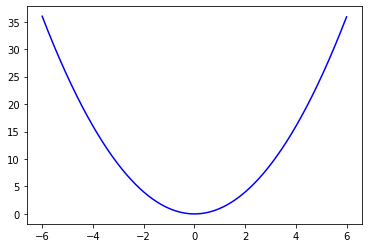

In [11]:
color = 'r'    
#plt.plot(line_x, line_y, c='b')    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()

-0.33331536708100373